## Exam 2

## Q1: Using the percentage of the vote for Trump in a state, prepare several choropleth maps that provide an overview of the spatial distribution of the vote. Provide and interpretation of your maps as well as a justification for your choice of classification scheme. Motivate the one you would select if limited to only one.

In [1]:
import pysal as ps
import numpy as np
from pysal.contrib.viz import mapping as maps
import pandas as pd
from pylab import *
import seaborn as sns
import geopandas as gpd
from bokeh.plotting import *
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
# read data for both shape and attribute table
shp_link = "/Users/ursulaquan/gis321f16collaboratory/Ursula_Exam2/ElectionJoined.shp"
dbf_link = "/Users/ursulaquan/gis321f16collaboratory/Ursula_Exam2/ElectionJoined.dbf"
shp = ps.open(shp_link)

In [3]:
# try different classification methods according to Trump suppport rate in each state
values = np.array(ps.open(dbf_link).by_col('Election_T'))
values = values.astype(np.float)
classification1 = ps.Quantiles(values, 5)
classification2 = ps.Equal_Interval(values, 5)
classification3 = ps.Fisher_Jenks(values, 5)
classification4 = ps.Natural_Breaks(values, 5)
classification5 = ps.Box_Plot(values, 5)
classification6 = ps.Maximum_Breaks(values, 5)
ps.
claM = [classification1, classification2, classification3, classification4, classification5,classification6]

In [4]:
# define two functions to generate distribution plot and choropleth map.
def distribution(values, claM):
    plt.subplot(2,1,1)
    sns.set(palette="muted", color_codes=True,rc={"figure.figsize": (8, 4)})
    sns.set_style("ticks", {"xtick.major.size": 2, "ytick.major.size": 2})
    for i in claM.bins:
        plt.axvline(x = min(values))
        plt.axvline(x = i)
    fig = sns.distplot(values, hist=False,rug=True,kde_kws={"shade": True}, color = 'r')
    sns.plt.title(claM.name)
    plt.show()
def choroplethmap(shp_link, values, claM, selection):
    df = gpd.read_file(shp_link)
    nan = float('nan')
    lons = []
    lats = []
    # for multipolygon mapping
    for i,shape in enumerate(df.geometry.values):
        if shape.geom_type == 'MultiPolygon':
            gx = []
            gy = []
            ng = len(shape.geoms) - 1
            for j,member in enumerate(shape.geoms):
                xy = np.array(list(member.exterior.coords))
                xs = xy[:,0].tolist()
                ys = xy[:,1].tolist()
                gx.extend(xs)
                gy.extend(ys)
                if j < ng:
                    gx.append(nan)
                    gy.append(nan)
            lons.append(gx)
            lats.append(gy)
        else:     
            # for polygons mapping
            xy = np.array(list(shape.exterior.coords))
            xs = xy[:,0].tolist()
            ys = xy[:,1].tolist()
            lons.append(xs)
            lats.append(ys) 
        colors = []  
        # set color by myself. Lighter color for lower values, darker colors for higher values.
        color = ['#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15']
        for i in claM.yb:
            colors.append(color[i])
    p = figure(title=claM.name, toolbar_location='left',plot_width=700, plot_height=400,x_axis_location=None,y_axis_location=None)
    p.grid.grid_line_color = None
    p.toolbar_location = None
    p.outline_line_color = "white"
    p.min_border_top = 0
    p.patches(lons,lats, fill_alpha=0.7, fill_color= colors,line_color="black", line_width=2, line_alpha=selection)
    show(p,notebook_handle=True)    

               Quantiles                
 
Lower            Upper             Count
         x[i] <= 40.400               10
40.400 < x[i] <= 46.284                9
46.284 < x[i] <= 51.526               10
51.526 < x[i] <= 59.664                9
59.664 < x[i] <= 68.170               10


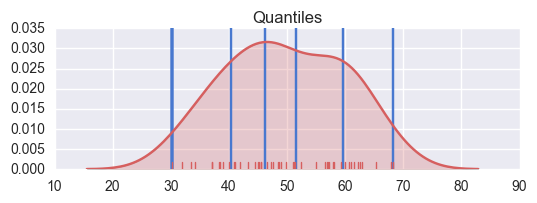

             Equal Interval             
 
Lower            Upper             Count
         x[i] <= 37.850                6
37.850 < x[i] <= 45.430               11
45.430 < x[i] <= 53.010               13
53.010 < x[i] <= 60.590               10
60.590 < x[i] <= 68.170                8


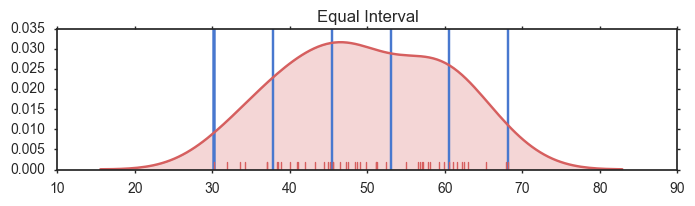

              Fisher_Jenks              
 
Lower            Upper             Count
         x[i] <= 34.150                4
34.150 < x[i] <= 43.250               10
43.250 < x[i] <= 52.430               16
52.430 < x[i] <= 60.570               10
60.570 < x[i] <= 68.170                8


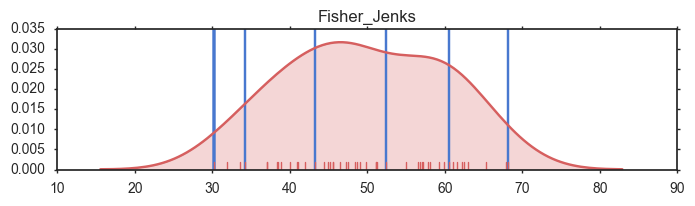

             Natural_Breaks             
 
Lower            Upper             Count
         x[i] <= 37.110                6
37.110 < x[i] <= 44.430                9
44.430 < x[i] <= 52.430               15
52.430 < x[i] <= 59.940                9
59.940 < x[i] <= 68.170                9


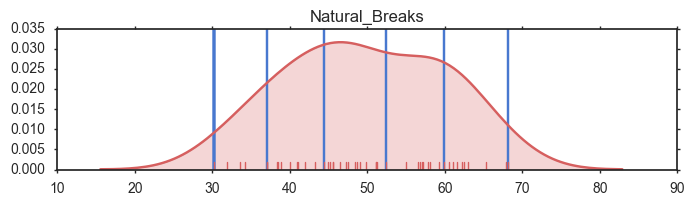

                 Box Plot                 
 
 Lower            Upper              Count
          x[i] <= -39.417                0
-39.417 < x[i] <=  41.695               12
 41.695 < x[i] <=  48.835               12
 48.835 < x[i] <=  57.917               12
 57.917 < x[i] <= 139.030               12


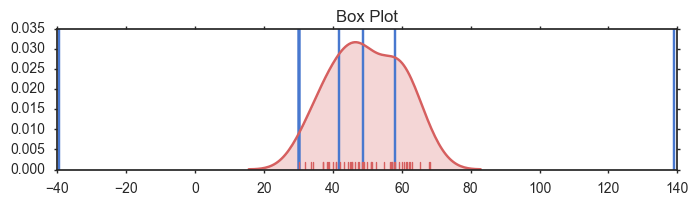

             Maximum_Breaks             
 
Lower            Upper             Count
         x[i] <= 35.610                4
35.610 < x[i] <= 53.685               26
53.685 < x[i] <= 64.140               15
64.140 < x[i] <= 66.590                1
66.590 < x[i] <= 68.170                2


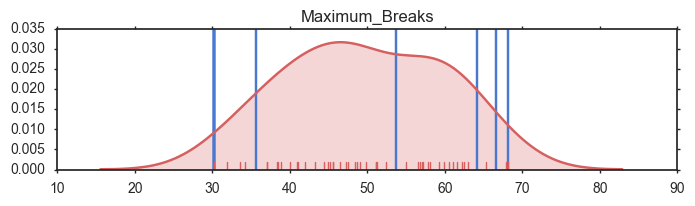

In [5]:
# show classes detail, distribution plot and choropleth map
for i in claM:
    print(i)
    distribution(values, i)
    choroplethmap(shp_link, values,i,0.7)

In [6]:
# calculate the Goodness of absolute deviation of fit and comapare
qt = classification1.gadf
ei = classification2.gadf
fj = classification3.gadf
nb = classification4.gadf
bp = classification5.gadf
mb = classification6.gadf

print("Goodness of absolute deviation of fit:\n Quantiles:%.4f,\n Equal Interval:%.4f,\n Fisher Jenks:%.4f,\n Natural Breaks:%.4f,\n Box plot:%.4f,\n Maximum_Breaks:%.4f" %(qt,ei,fj,nb,bp,mb))

Goodness of absolute deviation of fit:
 Quantiles:0.7838,
 Equal Interval:0.7772,
 Fisher Jenks:0.7821,
 Natural Breaks:0.7836,
 Box plot:0.7823,
 Maximum_Breaks:0.6518


#### In the maps showed above, we can see the different maps give us space distribution of Trump votes states values. Quantiles: in this classification, the counts of values in each class are equal or very similar. So all of colors distributed in equal numbers.  There is no significant clustered states in same class; Equal Interval is a method that devid the all values into equal range of values. Since in this case, the distribution of data is like normally distributed, the counts in 3rd class has the more values than other classes and the third and fourth classes with darker yelow and red are more than other classes, which take up the majority of states in this map. Then we can draw the primary conclusion that support rates in majority of states are between 45% to 55%. Fisher Jenks is a method that divide the dataset according to the values' similarity. Both Natural Break and Fisher Jenks divide the dataset by seeking to reduce the variance within classes and maximize the variance between classes. So the goodness of  absolute deviation of fit is related higher. Maximum Breaks is to set breaks in large value differences between two adjacent values. 
#### Answer: The Goodness of absolute deviation of fit (GDAF) is a value to measure the suitablity of classification methods. In this case, the GDAF of Natural Break is higher, which is 0.7856. So if I can only pick up one classification method, I will chose Natural Break.

## Q2: Create a binary variable where 1=Republican win, 0=Democrat win for each state. Using the contiguity weight from PySAL, carry out a join count analysis of the vote. Provide an interpretation of your results with regard to whether the pattern is statistically significant or not.

In [7]:
# generate binary variable of trump wins or not and add this to attribute table
df = ps.pdio.read_files(shp_link)
t = [float(i) for i in df['Election_T'].values.tolist()]
c = [float(i) for i in df['Election_C'].values.tolist()]
R = np.zeros(len(df))
compare = zip(t,c)
for i,e in enumerate(compare):
    if e[0] > e[1]:
        R[i] = 1
win = pd.Series(R).astype(int)
df = df.assign(win=win.values)
print("The binary values shows in the last colum in the attribute table:")
df

The binary values shows in the last colum in the attribute table:


,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,Election_C,Election_T,geometry,win
0,20.750,34.956,1,1,Washington,53,Pacific,WA,52.90,37.07,<pysal.cg.shapes.Polygon object at 0x11f252b10>,0
1,45.132,34.527,2,2,Montana,30,Mtn,MT,35.94,56.47,<pysal.cg.shapes.Polygon object at 0x11f252c50>,1
2,9.571,18.899,3,3,Maine,23,N Eng,ME,47.85,45.15,<pysal.cg.shapes.Polygon object at 0x11f252cd0>,0
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,27.23,62.96,<pysal.cg.shapes.Polygon object at 0x11f252d90>,1
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,31.74,61.53,<pysal.cg.shapes.Polygon object at 0x11f252e10>,1
5,27.966,21.987,6,6,Wyoming,56,Mtn,WY,21.88,68.17,<pysal.cg.shapes.Polygon object at 0x11f252e90>,1
6,16.477,21.891,7,7,Wisconsin,55,E N Cen,WI,46.45,47.26,<pysal.cg.shapes.Polygon object at 0x11f252f10>,1
7,24.391,28.529,8,8,Idaho,16,Mtn,ID,27.48,59.25,<pysal.cg.shapes.Polygon object at 0x11f252fd0>,1
8,2.794,8.450,9,9,Vermont,50,N Eng,VT,56.68,30.27,<pysal.cg.shapes.Polygon object at 0x11f271d10>,0
9,25.577,29.510,10,10,Minnesota,27,W N Cen,MN,46.44,44.92,<pysal.cg.shapes.Polygon object at 0x11f271c90>,0


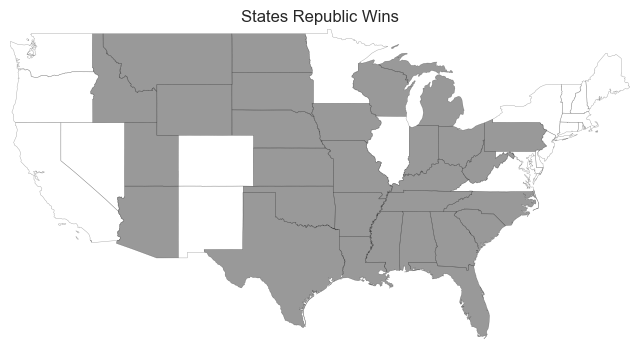

The states that Trump wins are showed.


In [8]:
# show the states trump wins
maps.plot_choropleth(shp_link, R, 'classless', title="States Republic Wins")
print("The states that Trump wins are showed.")

In [9]:
# contiguity weight and count join
w = ps.rook_from_shapefile(shp_link)
jc = ps.Join_Counts(R, w)

In [10]:
print("1, If we regard states trump wins as Black while Cliton wins as White we can see:\n The total joins are %d,\n black-black joins are %d,\n white-white joins are %d,\n black-white joins are %d.\n BB joins are more than half of totall joins."%(jc.J, jc.bb, jc.ww, jc.bw))
print("2, In %d permutations, pseudo-p value for Black-Black joins is %f and for Black-White joins are %f"%(jc.permutations, jc.p_sim_bb, jc.p_sim_bw))

1, If we regard states trump wins as Black while Cliton wins as White we can see:
 The total joins are 105,
 black-black joins are 54,
 white-white joins are 19,
 black-white joins are 32.
 BB joins are more than half of totall joins.
2, In 999 permutations, pseudo-p value for Black-Black joins is 0.001000 and for Black-White joins are 1.000000


#### Answer: Since the pseudo-p value in Black-Black joins is 0.001, which is far less than 0.05, we can say there is highley significant positive autocorrelation in states Trump wins.

## Q3: Using the same spatial weights matrix, but now the variable defined as the percentage vote for Trump, carry out a global spatial autocorrelation analysis using Moran's I. Again, provide an interpretation of your results with regard to whether the pattern is statistically significant or not. Does this result agree with what you found in the join count analysis - how so?

In [11]:
# Moran's I for vote rate for trump
values = np.array(ps.open(dbf_link).by_col('Election_T'))
values = values.astype(np.float)
m = ps.Moran(values, w, permutations = 9999)

In [12]:
print("Global Moran's I is %.4f, if there is no correlation between neighbouring values, expectancy is %.4f."%(m.I, m.EI))

Global Moran's I is 0.4050, if there is no correlation between neighbouring values, expectancy is -0.0213.


#### Conlusion: The Moran's I is a value to massure the global similarity between nearby area units. So in the case of vote rate for Trump in US, with contiguity weight mitrix for each state, the value of Moran's I is positive, which means that this is related strong positive autocorrelation.

In [13]:
print("The z value that to measure how many standard deviations values away from the mean is %.4f"%m.z_sim)
print("The p value, which used for significance testing, based on 9999 permutations is %.4f."%m.p_sim)

The z value that to measure how many standard deviations values away from the mean is 4.3402
The p value, which used for significance testing, based on 9999 permutations is 0.0002.


#### Conclusion: Since the z value is positive and p value vote rete for Trump is 0.0002, which is far less than 0.05, we can say there is highley significant positive autocorrelation and clustering in states Trump wins compared with random spatial process. This siginificance result is same as in the count join analysis.

In [14]:
# outline transparancy list
w = []
for i,polygon in enumerate(ps.open(shp_link)):
    if R[i] == 1:
        w.append(1)
    else:
        w.append(0)

In [15]:
choroplethmap(shp_link, values, classification4, w)

#### In map show before, the states Trump wins have related higher vote rate (with black outline). So the 'BB join' in count join analysis is equal to darker red join with darker red state. The count join analysis result indicating the distribution of BB join is significantly autocorrelated also tell us the higher vote rate states distribution is significantly autocorrelated. In this way, when we say values distribution pattern is statistically significant, we expect in this pattern, higher values distribute in specific clusters and lower values distribute in other cluster. Therefore, when count join analysis of states Trump wins shows the statistically significant pattern, the higher vote rate states would in clustered pattern, which indicate the distribution of vote rate is also statistically significant.